### Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for cab company. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, the company is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

Provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

#### Necessary Liabrary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import KNNImputer


In [2]:
df= pd.read_csv('ola_driver.csv')
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


#### Dropping 'Unnamed:0'

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

#### Converting features to respective data-types

In [4]:
df["MMM-YY"] = pd.to_datetime(df["MMM-YY"])
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])

#### Check for missing values

In [5]:
df.isnull().sum() / len(df) * 100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [ ]:
df.info()

In [9]:
df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

#### Preparing for filling nan values for only 'Age' and 'Gender'

In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean',)
imputer.fit(df[['Age','Gender']])
# transform the dataset
df[['Age','Gender']] = imputer.transform(df[['Age','Gender']])

In [12]:
df.isnull().sum() / len(df) * 100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.000000
Gender                   0.000000
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [13]:
df['Gender'].value_counts()

Gender
0.0    11089
1.0     8001
0.2       10
0.8        3
0.6        1
Name: count, dtype: int64

In [14]:
df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        37
Gender                      5
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

#### Aggregation at Driver Level

In [6]:
new_df = pd.DataFrame()

In [7]:
new_df['Driver_ID']=df['Driver_ID'].unique()

In [8]:
new_df['Age'] = list(df.groupby('Driver_ID',axis=0).max('MMM-YY')['Age'])
new_df['Gender'] = list(df.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
new_df['City'] = list(df.groupby('Driver_ID').agg({'City':'last'})['City'])
new_df['Education'] = list(df.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
new_df['Income'] = list(df.groupby('Driver_ID').agg({'Income':'last'})['Income'])
new_df['Dateofjoining'] = list(df.groupby('Driver_ID').agg({'Dateofjoining':'last'})['Dateofjoining'])

new_df['Joining_Designation'] = list(df.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])
new_df['Grade'] = list(df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
new_df['Total_Business_Value'] = list(df.groupby('Driver_ID',axis=0).sum('Total Business Value')['Total Business Value'])
new_df['Last_Quarterly_Rating'] = list(df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])
new_df['Target'] = list(df.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].notna().astype(int))

new_df['is_rating_increased'] = list((df.groupby('Driver_ID')['Quarterly Rating'].last() > df.groupby('Driver_ID')['Quarterly Rating'].first()).astype(int))
new_df['is_income_increased'] = list((df.groupby('Driver_ID')['Income'].last() > df.groupby('Driver_ID')['Income'].first()).astype(int))
new_df['is_grade_increased'] = list((df.groupby('Driver_ID')['Grade'].last() > df.groupby('Driver_ID')['Grade'].first()).astype(int))
new_df['is_joining_increased'] = list((df.groupby('Driver_ID')['Joining Designation'].last() > df.groupby('Driver_ID')['Joining Designation'].first()).astype(int))


In [9]:
new_df.drop('Last_Quarterly_Rating',axis=1,inplace=True)

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   Age                   2381 non-null   float64       
 2   Gender                2381 non-null   float64       
 3   City                  2381 non-null   object        
 4   Education             2381 non-null   int64         
 5   Income                2381 non-null   int64         
 6   Dateofjoining         2381 non-null   datetime64[ns]
 7   Joining_Designation   2381 non-null   int64         
 8   Grade                 2381 non-null   int64         
 9   Total_Business_Value  2381 non-null   int64         
 10  Target                2381 non-null   int64         
 11  is_rating_increased   2381 non-null   int64         
 12  is_income_increased   2381 non-null   int64         
 13  is_grade_increased

#### Distribution of Target variable

<Axes: xlabel='Target', ylabel='count'>

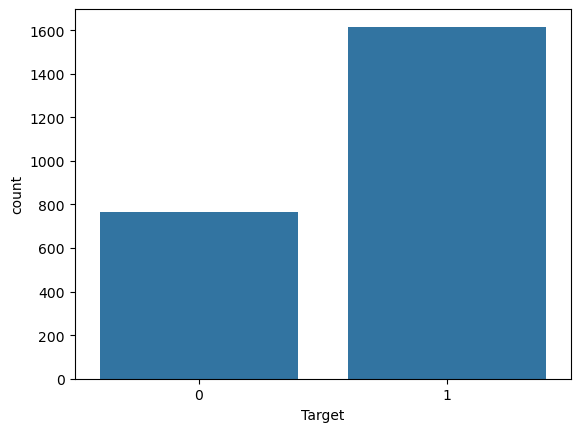

In [14]:
sns.countplot(data=new_df,x='Target')

In [25]:
# Distribution of target variable is not balanced.
# There are more proportion of people who left than stayed.

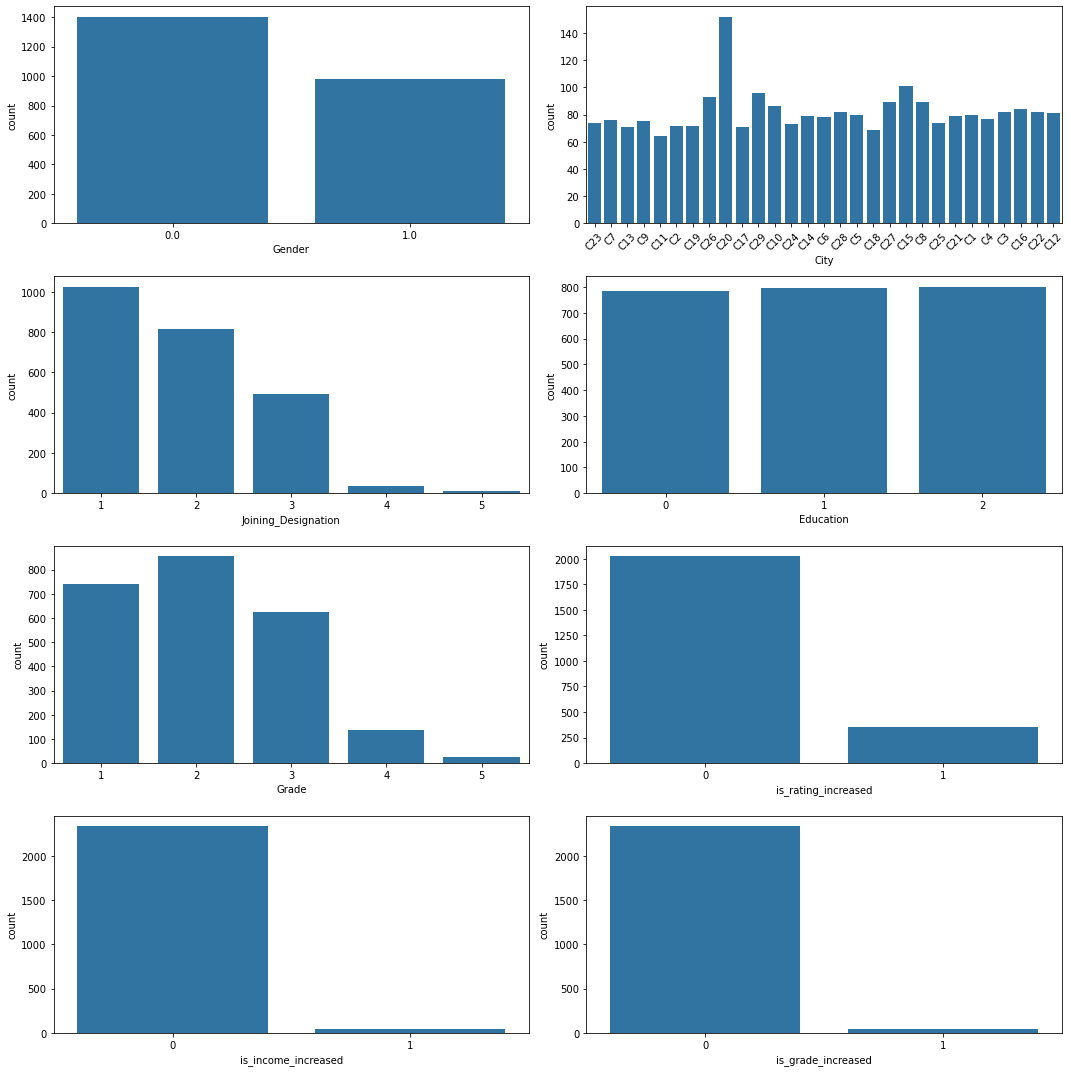

In [12]:
plt.figure(figsize=(15, 15))
plt.subplot(421)
sns.countplot(data=new_df, x="Gender")
# final_data["Gender"].value_counts(normalize=True).plot.bar('Gender')

plt.subplot(422)
sns.countplot(data=new_df, x="City")
plt.xticks(rotation="45")

plt.subplot(423)
sns.countplot(data=new_df, x="Joining_Designation")

plt.subplot(424)
sns.countplot(data=new_df, x="Education")

plt.subplot(425)
sns.countplot(data=new_df, x="Grade")

plt.subplot(426)
sns.countplot(data=new_df, x="is_rating_increased")

plt.subplot(427)
sns.countplot(data=new_df, x="is_income_increased")

plt.subplot(428)
sns.countplot(data=new_df, x="is_grade_increased")

plt.tight_layout()

**OBSERVATIONS**

- Out of 2381 employees, 1404 employees are of the Male gender and 977 are females.
- Out of 2381 employees, 152 employees are from city C20 and 101 from city C15.
- Out of 2381 employees, 802 employees have their education as Graduate and 795 have completed their 12.
- Out of 2381 employees, 1026 joined with the grade as 1, 815 employees joined with the grade 2.
- Out of 2381 employees, 855 employees had their designation as 2 at the time of reporting.
- Out of 2381 employees, 1744 employees had their last quarterly rating as 1.
- Out of 2381 employees, the quarterly rating has not increased for 2076 employees.

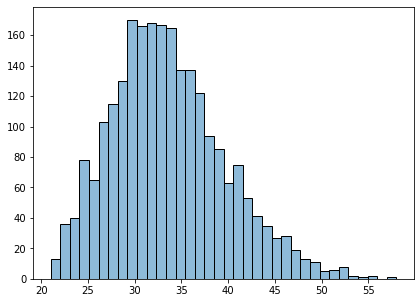

In [27]:
try:
    plt.subplots(figsize=(15,5))
    plt.subplot(121)
    sns.histplot(new_df['Age'], kde=True)
    plt.title("Age of drivers")
    plt.subplot(122)
    new_df['Age'].plot.box(title='Boxplot of Age')
    plt.tight_layout(pad=3)
except:
    pass

**OBSERVATION**

- The distribution of age slightly skewed on right which might indicate the outliers in the data

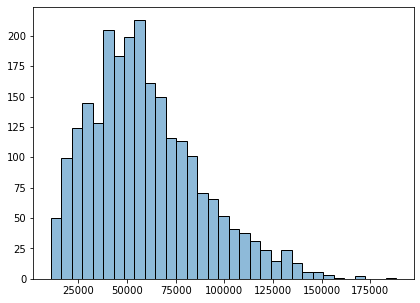

In [28]:
try:
    plt.subplots(figsize=(15,5))
    plt.subplot(121)
    sns.histplot(new_df['Income'], kde=True)
    plt.title("Monthly Income of drivers")
    plt.subplot(122)
    new_df['Income'].plot.box(title='Boxplot of Income')
    plt.tight_layout(pad=3)
except:
    pass

**OBSERVATION**

- The distribution of monthly income skewed on right which might indicate the outliers in the data

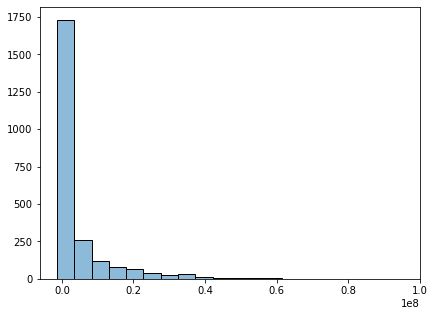

In [29]:
try:
    plt.subplots(figsize=(15,5))
    plt.subplot(121)
    sns.histplot(new_df['Total_Business_Value'], kde=True, bins=20)
    plt.title("Total_Business_Value of drivers")
    plt.subplot(122)
    new_df['Total_Business_Value'].plot.box(title='Boxplot of Total_Business_Value')
    plt.tight_layout(pad=3)
except:
    pass

**OBSERVATION**

- The distribution of total business value highly skewed on right which might indicate the outliers in the data

### BI-VARIATE ANALYSIS

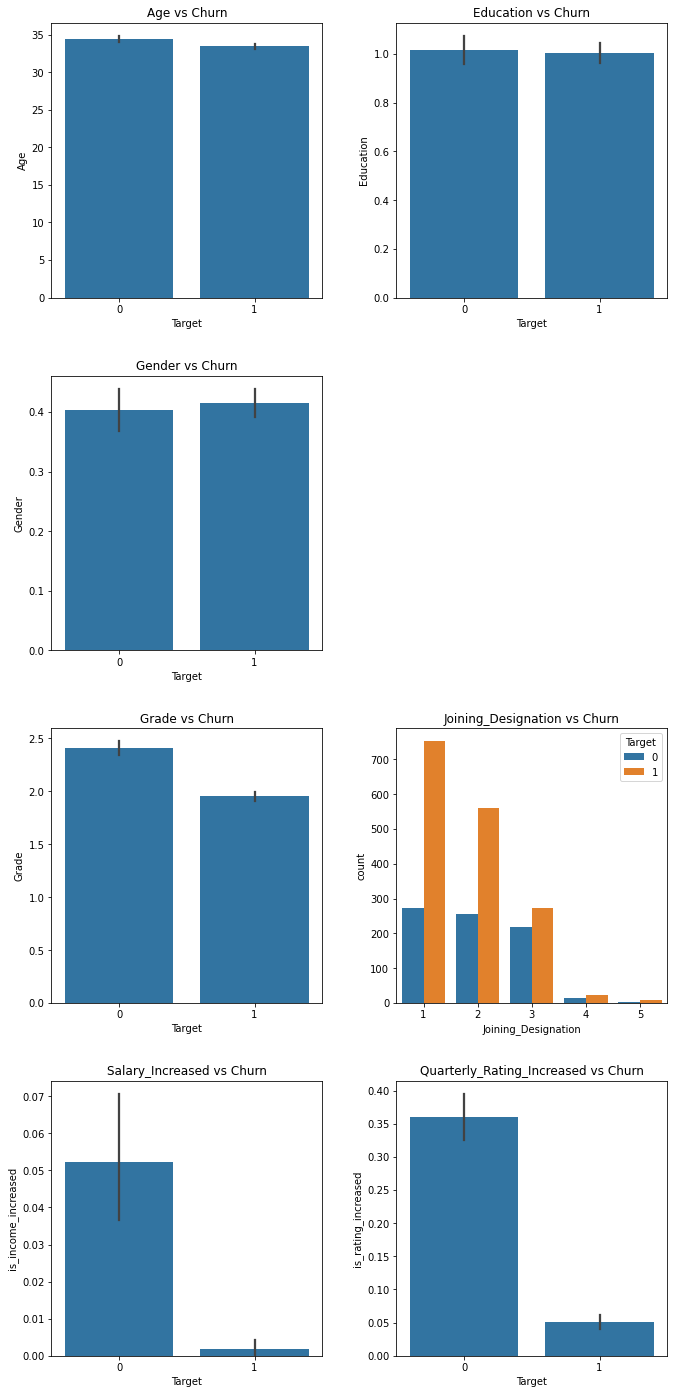

In [67]:
plt.figure(figsize=(10,20))

plt.subplot(421)
sns.barplot(data=new_df, x="Target", y="Age")
plt.title("Age vs Churn")

plt.subplot(422)
sns.barplot(data=new_df, x="Target", y="Education")
plt.title("Education vs Churn")

plt.subplot(423)
sns.barplot(data=new_df, x="Target", y="Gender")
plt.title("Gender vs Churn")

plt.subplot(425)
sns.barplot(data=new_df, x="Target", y="Grade")
plt.title("Grade vs Churn")

plt.subplot(426)
sns.countplot(data=new_df, x="Joining_Designation", hue="Target")
plt.title("Joining_Designation vs Churn")

plt.subplot(427)
sns.barplot(data=new_df, x="Target", y="is_income_increased")
plt.title("Salary_Increased vs Churn")

plt.subplot(428)
sns.barplot(data=new_df, x="Target", y="is_rating_increased")
plt.title("Quarterly_Rating_Increased vs Churn")

plt.tight_layout(pad=3)

**OBSERVATIONS**

- The proportion of Age, gender and education is more or less the same for both the employees who left the organization and those who did not leave.
- The employees who have their grade as 3 or 4 at the time of joining are less likely to leave the organization.
- The employees whose quarterly rating has increased are less likely to leave the organization.
- The employees whose monthly salary has not increased are more likely to leave the organization.

### SPLITTING THE DATASET

In [9]:
new_df

,Driver_ID,Age,Gender,City,Education,Income,Dateofjoining,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Target,is_rating_increased,is_income_increased,is_grade_increased,is_joining_increased
0,1,28.0,0.0,C23,2,57387,2018-12-24,1,1,1715580,2,1,0,0,0,0
1,2,31.0,0.0,C7,2,67016,2020-11-06,2,2,0,1,0,0,0,0,0
2,4,43.0,0.0,C13,2,65603,2019-12-07,2,2,350000,1,1,0,0,0,0
3,5,29.0,0.0,C9,0,46368,2019-01-09,1,1,120360,1,1,0,0,0,0
4,6,31.0,1.0,C11,1,78728,2020-07-31,3,3,1265000,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,2015-10-15,2,3,21748820,4,0,1,0,0,0
2377,2785,34.0,1.0,C9,0,12105,2020-08-28,1,1,0,1,1,0,0,0,0
2378,2786,45.0,0.0,C19,0,35370,2018-07-31,2,2,2815090,1,1,0,0,0,0
2379,2787,28.0,1.0,C20,2,69498,2018-07-21,1,1,977830,1,1,0,0,0,0


In [10]:
X = new_df.copy()

In [11]:
X.drop(['Target','Driver_ID'],axis=1,inplace=True)

In [12]:
X.drop('Dateofjoining',axis=1,inplace=True)

In [13]:
y = new_df['Target']

#### DOING ONE HOT ENCODING FOR 'CITY'

In [13]:
#RUN ONLY IF YOU ARE USING OHE ENCODING AND USING STACKED CLASSIFIER MODEL


X = pd.concat([X,pd.get_dummies(X['City'],prefix='City').astype(int)],axis=1)
X.drop('City',axis=1,inplace=True)

In [15]:
from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Split the remaining 30% into validation and test sets (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [17]:
print(f"Training set: {len(y_train)} samples")
print(f"Validation set: {len(y_val)} samples")
print(f"Test set: {len(y_test)} samples")

Training set: 1666 samples
Validation set: 357 samples
Test set: 358 samples


#### LABEL ENCODING
- DOING MEAN LABEL ENCODING FOR 'CITY'

In [ ]:
# DO IF YOU ARE DOING LABEL ENCODING AND NOT USING STACKED CLASSIFIER

In [16]:
# Compute target encoding on Training Set Only
city_probs = X_train.copy()
city_probs['target'] = y_train  # Add target to training features
city_probs = city_probs.groupby('City')['target'].mean()  # Compute mean target for each city


In [17]:
# Step 4: Apply encoding to Train, Validation, and Test sets
X_train['City_encoded'] = X_train['City'].map(city_probs)
X_val['City_encoded'] = X_val['City'].map(city_probs)   # Use train mappings
X_test['City_encoded'] = X_test['City'].map(city_probs) # Use train mappings

In [18]:
X_train.shape, X_val.shape, X_test.shape

((1666, 16), (357, 16), (358, 16))

#### REMOVING CATEGORICAL FEATURES FROM TRAINING, VALIDATION AND TESTING DATASET.

In [16]:
# RUN ONLY IF USE LABEL ENCODING

X_train = X_train.drop(['City','Dateofjoining'],axis=1)
X_val = X_val.drop(['City','Dateofjoining'],axis=1)
X_test = X_test.drop(['City','Dateofjoining'],axis=1)

KeyError: "['City', 'Dateofjoining'] not found in axis"

In [ ]:
X_train

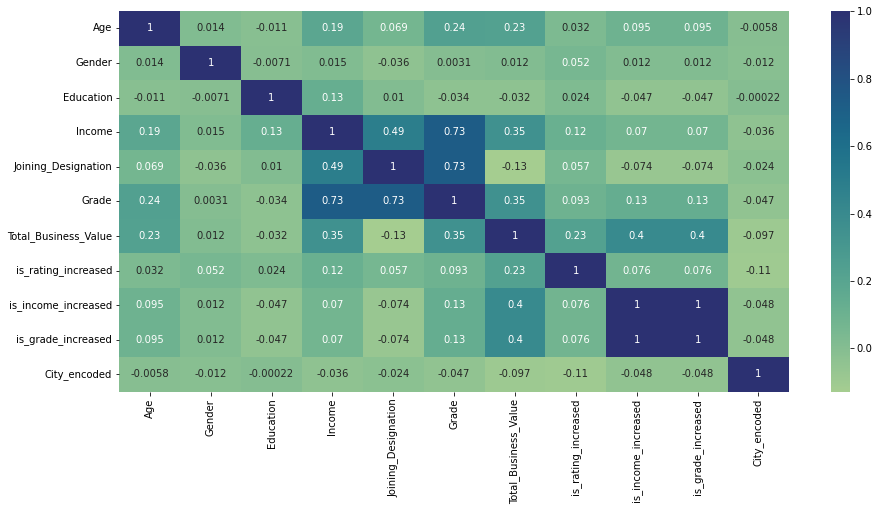

In [22]:
plt.figure(figsize=(15, 7))

sns.heatmap(X_train.corr(method="pearson"), annot=True, cmap="crest")
plt.show()

#### SCALING THE DATASET

In [18]:
# SAVING THE COLUMN NAMES
train_col = X_train.columns
val_col = X_val.columns
test_col = X_test.columns

In [ ]:
# FITTING, TRANSFORMING ON TRAIN SET AND TRANSFORMING USING ITS VALUES TO VALIDATION AND TEST SET.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [19]:
# RETREVING BACK THE COLUMNS

X_train = pd.DataFrame(X_train)
X_train.columns = train_col

X_val = pd.DataFrame(X_val)
X_val.columns = val_col

X_test = pd.DataFrame(X_test)
X_test.columns = test_col

#### USING RANDOM FORREST

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### BASE MODEL

In [20]:
random_forest_base_model = RandomForestClassifier()
random_forest_base_model.fit(X_train,y_train)


RandomForestClassifier()

In [21]:
y_pred_base_rf_tr = random_forest_base_model.predict(X_train)
print("Classification Report:\n", classification_report(y_train, y_pred_base_rf_tr))
print("Validation accuracy:", accuracy_score(y_train, y_pred_base_rf_tr))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.87       535
           1       0.90      1.00      0.95      1131

    accuracy                           0.93      1666
   macro avg       0.95      0.89      0.91      1666
weighted avg       0.94      0.93      0.93      1666

Validation accuracy: 0.9285714285714286


In [22]:
y_pred_base_rf_val = random_forest_base_model.predict(X_val)
print("Classification Report:\n", classification_report(y_val, y_pred_base_rf_val))
print("Validation accuracy:", accuracy_score(y_val, y_pred_base_rf_val))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.50      0.59       115
           1       0.79      0.90      0.85       242

    accuracy                           0.78       357
   macro avg       0.75      0.70      0.72       357
weighted avg       0.77      0.78      0.76       357

Validation accuracy: 0.7759103641456583


- BASE MODEL OF RANDOM FORREST WITH NO HYPERPARAMETER TUNED GIVES 81% OF ACCURACY
- NOTE: DATASET wrt TARGET VARIABLE IS NOT BALANCED

#### TUNED MODEL

In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [26]:
# Defining parameters -

params = {
          'n_estimators' : [100,150,200,400],
          'max_depth' : [3,4,5,6,7],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [1,2,3]}

# Define Stratified K-Fold for cross-validation

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# FITTING INTO GRIDSEARCH FOR FINDING BEST PARAMETER
grid_search = GridSearchCV(estimator = RandomForestClassifier(class_weight='balanced',verbose=1),
                    param_grid = params, scoring = 'f1_weighted', cv = kf, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model_rf = grid_search.best_estimator_
y_pred_best_rf_val = best_model_rf.predict(X_val)
print("Classification Report:\n", classification_report(y_val, y_pred_best_rf_val))

y_pred_best_rf_test = best_model_rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf_test))

In [33]:
# TESTING ON TEST DATASET
y_pred_best_rf_test = best_model_rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.54      0.62       115
           1       0.81      0.91      0.85       243

    accuracy                           0.79       358
   macro avg       0.77      0.72      0.74       358
weighted avg       0.78      0.79      0.78       358



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


### USING DECISION TREE

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


# Create base Decision Tree classifer object
dt_base_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_base_model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_base_dt_tr = dt_base_model.predict(X_train)
y_pred_base_dt_val = dt_base_model.predict(X_val)

print(classification_report(y_train, y_pred_base_dt_tr))
print('---------------------------------------------------------------------')
print(classification_report(y_val, y_pred_base_dt_val))


              precision    recall  f1-score   support

           0       1.00      0.78      0.87       535
           1       0.90      1.00      0.95      1131

    accuracy                           0.93      1666
   macro avg       0.95      0.89      0.91      1666
weighted avg       0.94      0.93      0.93      1666

---------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.50      0.59       115
           1       0.79      0.90      0.85       242

    accuracy                           0.78       357
   macro avg       0.75      0.70      0.72       357
weighted avg       0.77      0.78      0.76       357



In [39]:
# HYPERPARAMETER TUNING

In [31]:
param_grid_dt = {
    'max_depth': [3, 5, 10],  
    'min_samples_split': [2, 5, 6],  
    'min_samples_leaf': [1, 2, 5],  
    'criterion': ['gini', 'entropy'] }

In [32]:
# Define Stratified K-Fold for cross-validation

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

In [33]:
from sklearn.metrics import f1_score

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(class_weight='balanced',random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=kf, scoring='recall', n_jobs=-1, verbose=1)

# Fit on training data
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 6]},
             scoring='recall', verbose=1)

In [34]:

# Print best parameters and best F1-score
print("Best Parameters:", grid_search_dt.best_params_)
print("Best F1-Score:", grid_search_dt.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1-Score: 0.8275544813067718


In [35]:
# Getting the best model found by GridSearchCV

best_dt = grid_search_dt.best_estimator_

In [36]:
y_pred_tuned_dt_val = best_dt.predict(X_val)

In [37]:
print(classification_report(y_val, y_pred_tuned_dt_val))

              precision    recall  f1-score   support

           0       0.56      0.63      0.59       115
           1       0.81      0.76      0.79       242

    accuracy                           0.72       357
   macro avg       0.69      0.70      0.69       357
weighted avg       0.73      0.72      0.72       357



### USING XGBOOST

In [24]:
from xgboost import XGBClassifier

In [25]:
# USING BASE XGBOOST 

xgb_model_base = XGBClassifier(random_state=42)
xgb_model_base.fit(X_train, y_train)
y_pred_base_xgb_val = xgb_model_base.predict(X_val)
print(classification_report(y_val, y_pred_base_xgb_val))

              precision    recall  f1-score   support

           0       0.73      0.48      0.58       115
           1       0.79      0.92      0.85       242

    accuracy                           0.78       357
   macro avg       0.76      0.70      0.71       357
weighted avg       0.77      0.78      0.76       357



In [26]:
# COMPUTING SCALE_POS_WEIGHT
# Count the number of samples in each class
neg, pos = np.bincount(y_train)  # y_train must be binary (0 & 1)

# Compute scale_pos_weight
scale_pos_weight = neg / pos
print(scale_pos_weight)

0.47303271441202477


In [27]:
# USING HYPERTUNED XGBOOST 

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, scale_pos_weight, scale_pos_weight * 1.5, scale_pos_weight * 2]}

In [28]:
# Define Stratified K-Fold for cross-validation

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

In [29]:
# Initialize XGBoost Classifier
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    use_label_encoder=False
    )

# Perform Grid Search with Stratified K-Fold for cross-validation
grid_search_xgb = GridSearchCV(
    xgb_clf, xgb_param_grid, cv=kf, scoring='f1', n_jobs=-1, verbose=1
)

In [30]:
# Fit on training data
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importanc...
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'scale_pos_weight': [1,
                                              np.float64(0.47303271441202477),
                                              np.float64(0.7095490716180372),
                                              np.float64(0.9460654288240495)],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='f1', verbose=1)

In [31]:
# Get best parameters & best model
best_params = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 1.0}


In [32]:
# Predict on test data
y_pred_tuned_xgb_val = best_xgb_model.predict(X_val)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_val, y_pred_tuned_xgb_val))

              precision    recall  f1-score   support

           0       0.84      0.58      0.69       115
           1       0.83      0.95      0.88       242

    accuracy                           0.83       357
   macro avg       0.83      0.76      0.78       357
weighted avg       0.83      0.83      0.82       357



In [48]:
# Evaluate performance
from sklearn.metrics import f1_score
xgb_val_f1 = f1_score(y_val, y_pred_tuned_xgb_val)
print(f"F1-Score for validation is : {xgb_val_f1:.4f}")

F1-Score for validation is : 0.8820


In [ ]:
# FEATURE IMPORTANCE

XGBoost Feature Importance: [0.0271469  0.02276535 0.01524167 0.0186286  0.09079694 0.02656572
 0.13921732 0.24804357 0.         0.         0.         0.01242953
 0.         0.         0.02383762 0.02635456 0.01300938 0.03616709
 0.0228391  0.         0.02252898 0.04268314 0.         0.
 0.         0.0115003  0.         0.01135686 0.         0.015937
 0.01447629 0.02191462 0.03461288 0.0185858  0.         0.01645404
 0.01448825 0.02246332 0.         0.02995527]


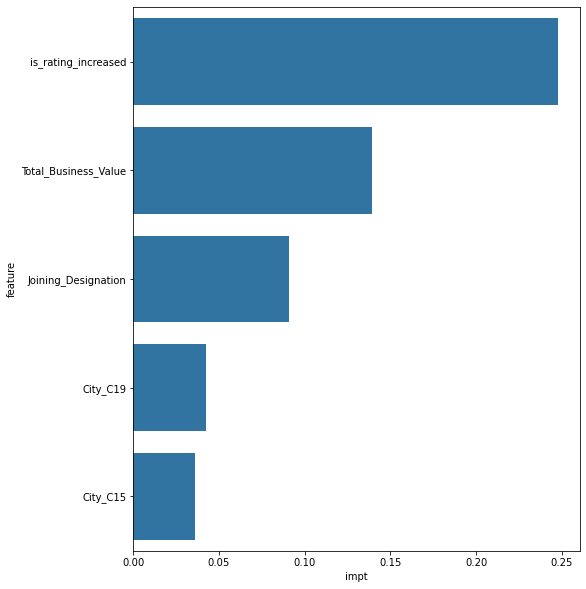

In [49]:
xgb_importance = best_xgb_model.feature_importances_
print("XGBoost Feature Importance:", xgb_importance)

k=5
feat_imp_dt = pd.DataFrame(list(zip(X_train.columns,xgb_importance)),columns=['feature','impt'])
feat_imp_dt = feat_imp_dt.sort_values('impt',ascending=False).head(k)

plt.figure(figsize=(8,10))
sns.barplot(data=feat_imp_dt,y='feature',x='impt')
plt.show()

In [ ]:
# TEST DATASET

In [50]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_tuned_xgb_test = best_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_tuned_xgb_test))
xgb_test_f1 = f1_score(y_test, y_pred_tuned_xgb_test)
print(f"F1-Score for final test is : {xgb_test_f1:.4f}")

              precision    recall  f1-score   support

           0       0.74      0.51      0.61       115
           1       0.80      0.91      0.85       243

    accuracy                           0.78       358
   macro avg       0.77      0.71      0.73       358
weighted avg       0.78      0.78      0.77       358

F1-Score for final test is : 0.8522


### SCORES IN IMBALANCED DATASET IN VALIDATION SET

**F1 SCORE FOR BASE LEARNERS**
- F1 SCORE FOR VALIDATION WITH DECISION TREE IS 0.78
- F1 SCORE FOR VALIDATION WITH RANDOM FORREST IS 0.87
- F1 SCORE FOR VALIDATION WITH XGBOOST IS 0.84


**PRECISION SCORE FOR BASE LEARNERS**
- PRECISION SCORE FOR VALIDATION WITH DECISION TREE IS 0.77
- PRECISION SCORE FOR VALIDATION WITH RANDOM FORREST IS 0.83
- PRECISION SCORE FOR VALIDATION WITH XGBOOST IS 0.80


**RECALL SCORE FOR BASE LEARNERS**
- RECALL SCORE FOR VALIDATION WITH DECISION TREE IS 0.79
- RECALL SCORE FOR VALIDATION WITH RANDOM FORREST IS 0.91
- RECALL SCORE FOR VALIDATION WITH XGBOOST IS 0.88

**F1 SCORE FOR TUNED LEARNERS**
- F1 SCORE FOR VALIDATION WITH DECISION TREE IS 0.78
- F1 SCORE FOR VALIDATION WITH RANDOM FORREST IS 0.87
- F1 SCORE FOR VALIDATION WITH XGBOOST IS 0.8820


**PRECISION SCORE FOR TUNED LEARNERS**
- PRECISION SCORE FOR VALIDATION WITH DECISION TREE IS 0.85
- PRECISION SCORE FOR VALIDATION WITH RANDOM FORREST IS 0.84
- PRECISION SCORE FOR VALIDATION WITH XGBOOST IS 0.83


**RECALL SCORE FOR TUNED LEARNERS**
- RECALL SCORE FOR VALIDATION WITH DECISION TREE IS 0.73
- RECALL SCORE FOR VALIDATION WITH RANDOM FORREST IS 0.91
- RECALL SCORE FOR VALIDATION WITH XGBOOST IS 0.94

### Balancing Dataset using - SMOTE

#### CHECKING THE SCORES AGAIN WHILE USING SMOTE TO SEE ANY DIFFERENCE.
**As the target variable is imbalanced towards 1. We will use SMOTE to balance the dataset**

In [54]:
from imblearn.over_sampling import SMOTE


print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 7)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

Before OverSampling, counts of label '1': 1131
Before OverSampling, counts of label '0': 535 

After OverSampling, the shape of train_X: (2262, 12)
After OverSampling, the shape of train_y: (2262,) 

After OverSampling, counts of label '1': 1131
After OverSampling, counts of label '0': 1131


#### DECISION TREE

In [55]:
param_grid_dt = {
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],  
    'criterion': ['gini', 'entropy'] }

In [56]:
# Define Stratified K-Fold for cross-validation

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

In [57]:
from sklearn.metrics import f1_score

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(class_weight='balanced',random_state=42)

# Initialize GridSearchCV
grid_search_dt_sm = GridSearchCV(dt, param_grid_dt, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit on training data
grid_search_dt_sm.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [58]:

# Print best parameters and best F1-score
print("Best Parameters:", grid_search_dt_sm.best_params_)
print("Best F1-Score:", grid_search_dt_sm.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1-Score: 0.7510988688976147


In [59]:
# Getting the best model found by GridSearchCV

best_dt_sm = grid_search_dt_sm.best_estimator_

In [60]:
y_pred_tuned_dt_vals_sm = best_dt_sm.predict(X_val)

print(classification_report(y_val, y_pred_tuned_dt_vals_sm))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65       115
           1       0.84      0.82      0.83       242

    accuracy                           0.77       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.77      0.77      0.77       357



#### RANDOM FORREST

In [61]:
# Defining parameters -

params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [62]:
# Define Stratified K-Fold for cross-validation

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

In [63]:
# FITTING INTO GRIDSEARCH FOR FINDING BEST PARAMETER
grid_search_rf_sm = GridSearchCV(estimator = RandomForestClassifier(class_weight='balanced',verbose=1),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = kf,
                    n_jobs=-1
                    )

In [64]:
grid_search_rf_sm.fit(X_train_sm, y_train_sm)

print("Best params: ", grid_search_rf_sm.best_params_)
print("Best score: ", grid_search_rf_sm.best_score_)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s


Best params:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 400}
Best score:  0.8019457305280431


In [65]:
best_model_rf_sm = grid_search_rf_sm.best_estimator_
best_model_rf_sm

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=9,
                       n_estimators=400, verbose=1)

In [66]:
y_pred_best_rf_val_sm = best_model_rf_sm.predict(X_val)

print("Classification Report:\n", classification_report(y_val, y_pred_best_rf_val_sm))
print("Validation accuracy:", accuracy_score(y_val, y_pred_best_rf_val_sm))


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.65       115
           1       0.83      0.85      0.84       242

    accuracy                           0.78       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.78      0.78      0.78       357

Validation accuracy: 0.7815126050420168


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


#### XGBOOST

In [22]:
# COMPUTING SCALE_POS_WEIGHT
# Count the number of samples in each class
neg, pos = np.bincount(y_train)  # y_train must be binary (0 & 1)

# Compute scale_pos_weight
scale_pos_weight = neg / pos
print(scale_pos_weight)

0.47303271441202477


In [23]:
# USING HYPERTUNED XGBOOST 

xgb_param_grid_sm = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, scale_pos_weight, scale_pos_weight * 1.5, scale_pos_weight * 2]}

In [24]:
# Define Stratified K-Fold for cross-validation

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

In [25]:
# Initialize XGBoost Classifier
import xgboost as xgb

xgb_clf_sm = xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    use_label_encoder=False
    )

# Perform Grid Search with 5-fold Cross-Validation
grid_search_xgb_sm = GridSearchCV(
    xgb_clf_sm, xgb_param_grid_sm, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1
)

In [26]:
# Fit on training data
grid_search_xgb_sm.fit(X_train_sm, y_train_sm)

NameError: name 'X_train_sm' is not defined

In [72]:
# Get best parameters & best model
best_params_sm = grid_search_xgb_sm.best_params_
best_xgb_model_sm = grid_search_xgb_sm.best_estimator_

print("Best Parameters:", best_params_sm)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'scale_pos_weight': 1, 'subsample': 0.8}


In [73]:
# Predict on test data
y_pred_tuned_xgb_val_sm = best_xgb_model_sm.predict(X_val)

print(classification_report(y_val, y_pred_tuned_xgb_val_sm))

              precision    recall  f1-score   support

           0       0.63      0.58      0.61       115
           1       0.81      0.84      0.82       242

    accuracy                           0.76       357
   macro avg       0.72      0.71      0.71       357
weighted avg       0.75      0.76      0.75       357



### SCORES AFTER SMOTE IN VALIDATION SET

**F1 SCORE :**
- F1 SCORE FOR VALIDATION WITH DECISION TREE IS 0.83
- F1 SCORE FOR VALIDATION WITH RANDOM FORREST IS 0.84
- F1 SCORE FOR VALIDATION WITH XGBOOST IS 0.82

**PRECISION SCORE**
- PRECISION SCORE FOR VALIDATION WITH DECISION TREE IS 0.82
- PRECISION SCORE FOR VALIDATION WITH RANDOM FORREST IS 0.85
- PRECISION SCORE FOR VALIDATION WITH XGBOOST IS 0.84

**RECALL SCORE**
- RECALL SCORE FOR VALIDATION WITH DECISION TREE IS 0.84
- RECALL SCORE FOR VALIDATION WITH RANDOM FORREST IS 0.83
- RECALL SCORE FOR VALIDATION WITH XGBOOST IS 0.81

**ACCURACY SCORE**
- ACCURACY SCORE FOR VALIDATION WITH DECISION TREE IS 0.77
- ACCURACY SCORE FOR VALIDATION WITH RANDOM FORREST IS 0.78
- ACCURACY SCORE FOR VALIDATION WITH XGBOOST IS 0.76

### FEATURE IMPORTANCES

#### DECISION TREE

In [58]:
# Extract feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [59]:
feature_importance_dt

,Feature,Importance
6,Total_Business_Value,0.402203
7,is_rating_increased,0.399879
4,Joining_Designation,0.111469
0,Age,0.034087
3,Income,0.016198
5,Grade,0.012379
36,City_C7,0.012168
1,Gender,0.006496
13,City_C12,0.005121
30,City_C28,0.000000


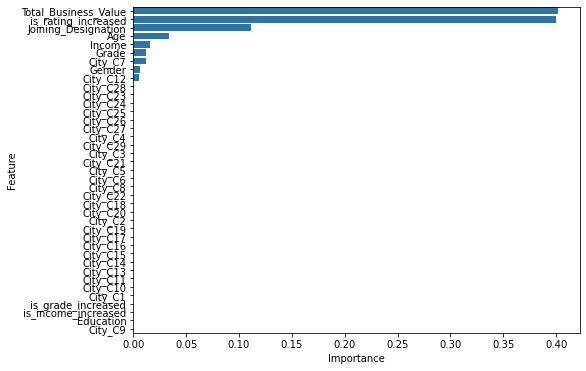

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_dt,y='Feature',x='Importance')
plt.show()

#### RANDOM FORREST

In [33]:
rf_fimpt =  best_model_rf.feature_importances_
rf_fimpt

array([0.03480971, 0.00483714, 0.00781566, 0.09129364, 0.05137877,
       0.06981177, 0.32749206, 0.30667758, 0.01574838, 0.0146288 ,
       0.00137794, 0.00107469, 0.00141841, 0.00298288, 0.00469371,
       0.00220971, 0.00136646, 0.00427235, 0.00271453, 0.0036751 ,
       0.00544913, 0.00236356, 0.00175345, 0.00151931, 0.00279486,
       0.00496959, 0.00145539, 0.0023647 , 0.00382643, 0.00215726,
       0.00281787, 0.00593561, 0.00144529, 0.00065558, 0.00110022,
       0.0010571 , 0.00404492, 0.0011081 , 0.00290236])

In [34]:
std = np.std([tree.feature_importances_ for tree in best_model_rf.estimators_], axis=0)

In [36]:
std

array([0.02748752, 0.00850012, 0.01339679, 0.0782938 , 0.05402679,
       0.07394548, 0.17357181, 0.17776452, 0.03209631, 0.02844128,
       0.00516994, 0.00479884, 0.00502069, 0.00697665, 0.01235923,
       0.00540043, 0.00671065, 0.0103613 , 0.01063607, 0.00785149,
       0.01247294, 0.00618597, 0.00530576, 0.00530419, 0.00765045,
       0.01025256, 0.00500006, 0.00657734, 0.00702139, 0.00655753,
       0.00680355, 0.01279413, 0.0047091 , 0.0024767 , 0.00418955,
       0.00488441, 0.00755064, 0.00533976, 0.00809563])

<Figure size 1080x504 with 0 Axes>

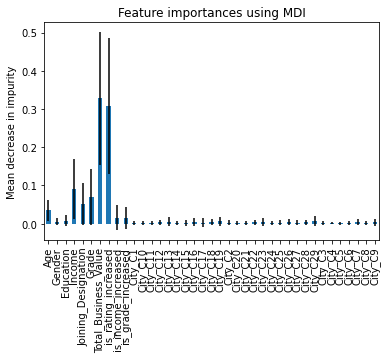

In [35]:
feature_importances = pd.Series(rf_fimpt, X_train.columns)

plt.figure(figsize=(15,7))
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

plt.show()

In [43]:
feat_imp_dt = pd.DataFrame(list(zip(X_train.columns,rf_fimpt)),columns=['feature','impt'])
feat_imp_dt

,feature,impt
0,Age,0.034810
1,Gender,0.004837
2,Education,0.007816
3,Income,0.091294
4,Joining_Designation,0.051379
5,Grade,0.069812
6,Total_Business_Value,0.327492
7,is_rating_increased,0.306678
8,is_income_increased,0.015748
9,is_grade_increased,0.014629


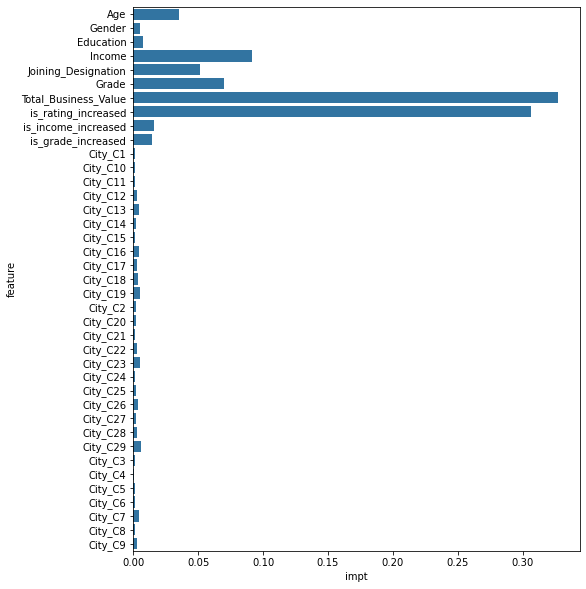

In [45]:
plt.figure(figsize=(8,10))
sns.barplot(data=feat_imp_dt,y='feature',x='impt')
plt.show()

#### XGBOOST

In [64]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


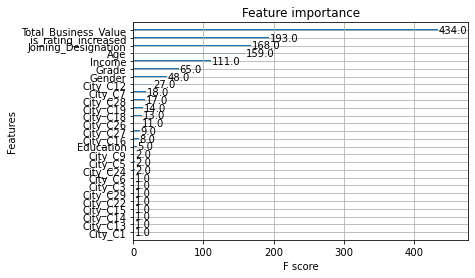

In [65]:
from xgboost import plot_importance
plot_importance(best_xgb_model)
plt.show()

In [66]:
importance_dict = best_xgb_model.get_booster().get_score(importance_type='gain')  # 'weight', 'cover', or 'gain'
print(importance_dict)

{'Age': 4.258831977844238, 'Gender': 3.5714499950408936, 'Education': 2.3911280632019043, 'Income': 2.922473430633545, 'Joining_Designation': 14.24431324005127, 'Grade': 4.167656421661377, 'Total_Business_Value': 21.84054946899414, 'is_rating_increased': 38.9133186340332, 'City_C1': 1.9499568939208984, 'City_C12': 3.7396697998046875, 'City_C13': 4.134529113769531, 'City_C14': 2.040924072265625, 'City_C15': 5.6739277839660645, 'City_C16': 3.5830211639404297, 'City_C18': 3.534367799758911, 'City_C19': 6.696173667907715, 'City_C22': 1.804178237915039, 'City_C24': 1.7816753387451172, 'City_C26': 2.5002126693725586, 'City_C27': 2.271055221557617, 'City_C28': 3.437986373901367, 'City_C29': 5.4301018714904785, 'City_C3': 2.9157581329345703, 'City_C5': 2.581326484680176, 'City_C6': 2.272930145263672, 'City_C7': 3.5240683555603027, 'City_C9': 4.699411392211914}


In [67]:
pd.Series(importance_dict)

Age                      4.258832
Gender                   3.571450
Education                2.391128
Income                   2.922473
Joining_Designation     14.244313
Grade                    4.167656
Total_Business_Value    21.840549
is_rating_increased     38.913319
City_C1                  1.949957
City_C12                 3.739670
City_C13                 4.134529
City_C14                 2.040924
City_C15                 5.673928
City_C16                 3.583021
City_C18                 3.534368
City_C19                 6.696174
City_C22                 1.804178
City_C24                 1.781675
City_C26                 2.500213
City_C27                 2.271055
City_C28                 3.437986
City_C29                 5.430102
City_C3                  2.915758
City_C5                  2.581326
City_C6                  2.272930
City_C7                  3.524068
City_C9                  4.699411
dtype: float64

In [68]:
feat_imp_xgb = pd.DataFrame(list(importance_dict.items()),columns=['feature','impt'])
feat_imp_xgb

,feature,impt
0,Age,4.258832
1,Gender,3.571450
2,Education,2.391128
3,Income,2.922473
4,Joining_Designation,14.244313
5,Grade,4.167656
6,Total_Business_Value,21.840549
7,is_rating_increased,38.913319
8,City_C1,1.949957
9,City_C12,3.739670


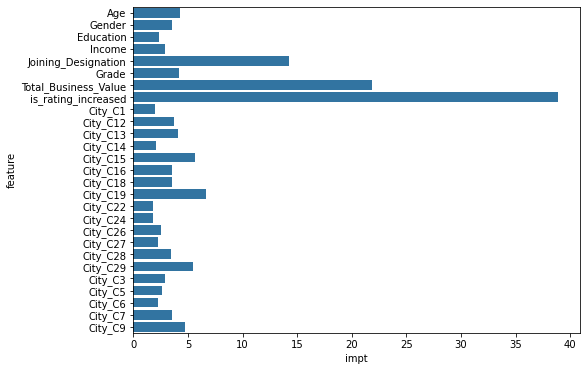

In [69]:
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp_xgb,y='feature',x='impt')
plt.show()

#### SEPARATE MODELS USING STRATIFIED KFOLD

In [30]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb
import numpy as np

# Define outer CV (for model evaluation)
outer_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define inner CV (for hyperparameter tuning)
inner_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metric
scoring = make_scorer(f1_score, average='weighted')

#---------------------------------------------------------------------------------

### Random Forest Model ###
rf_params = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 5, 7],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_features': [8, 9, 10]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_rf = GridSearchCV(rf, param_grid=rf_params, scoring=scoring, cv=inner_kf, n_jobs=-1, verbose=1)
rf_nested_scores = cross_val_score(grid_rf, X, y, cv=outer_kf, scoring='f1_weighted', n_jobs=-1)
print("Random Forest Nested CV F1-score:", np.mean(rf_nested_scores))

#---------------------------------------------------------------------------------

### Decision Tree Model ###
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
grid_dt = GridSearchCV(dt, param_grid=dt_params, scoring=scoring, cv=inner_kf, n_jobs=-1, verbose=1)
dt_nested_scores = cross_val_score(grid_dt, X, y, cv=outer_kf, scoring='f1_weighted', n_jobs=-1)
print("Decision Tree Nested CV F1-score:", np.mean(dt_nested_scores))

#---------------------------------------------------------------------------------

### XGBoost Model ###
neg, pos = np.bincount(y)  # y must be binary (0 & 1)
scale_pos_weight = neg / pos

xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, scale_pos_weight, scale_pos_weight * 1.5, scale_pos_weight * 2]
}

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
grid_xgb = GridSearchCV(xgb_clf, param_grid=xgb_params, scoring=scoring, cv=inner_kf, n_jobs=-1, verbose=1)
xgb_nested_scores = cross_val_score(grid_xgb, X, y, cv=outer_kf, scoring='f1_weighted', n_jobs=-1)
print("XGBoost Nested CV F1-score:", np.mean(xgb_nested_scores))


Random Forest Nested CV F1-score: 0.7733329186450865
Decision Tree Nested CV F1-score: 0.7597782186103921
XGBoost Nested CV F1-score: 0.7856839826756961


In [ ]:
# GRAPH FOR THE SCORES

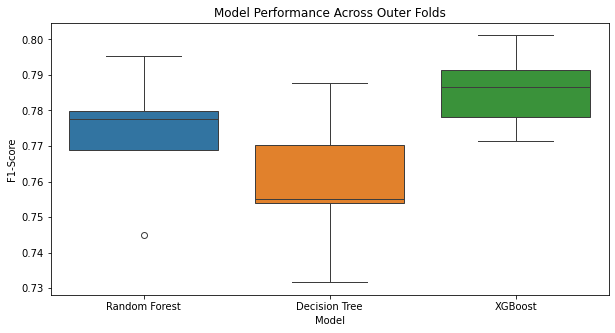

Random Forest: Mean F1 = 0.7733, Std = 0.0165
Decision Tree: Mean F1 = 0.7598, Std = 0.0187
XGBoost: Mean F1 = 0.7857, Std = 0.0103

Best Model: XGBoost
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


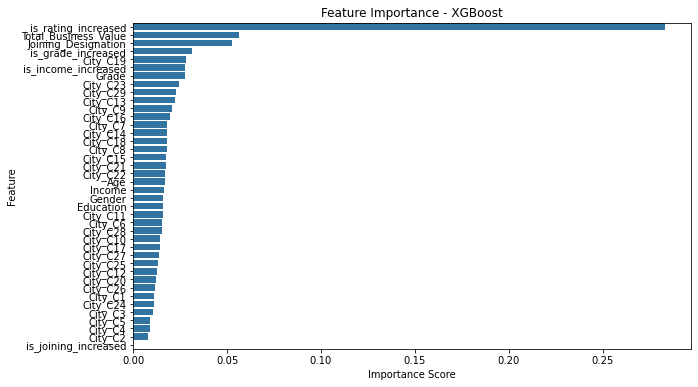

In [31]:
# Store F1-scores from Nested CV
cv_results = {
    "Random Forest": rf_nested_scores,
    "Decision Tree": dt_nested_scores,
    "XGBoost": xgb_nested_scores
}

# Convert to DataFrame for visualization
cv_df = pd.DataFrame(cv_results)

# Plot Model Performance as a Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=cv_df)
plt.title("Model Performance Across Outer Folds")
plt.ylabel("F1-Score")
plt.xlabel("Model")
plt.show()

# Print Mean and Standard Deviation for each model
for model_name, scores in cv_results.items():
    print(f"{model_name}: Mean F1 = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

# Identify the Best Model
best_model_name = max(cv_results, key=lambda k: np.mean(cv_results[k]))
print(f"\nBest Model: {best_model_name}")

# Train Best Model on Full Training Data
best_model = {
    "Random Forest": grid_rf,
    "Decision Tree": grid_dt,
    "XGBoost": grid_xgb
}[best_model_name]

best_model.fit(X_train, y_train)

# Extract Feature Importance
if best_model_name == "XGBoost":
    importances = best_model.best_estimator_.feature_importances_
else:
    importances = best_model.best_estimator_.feature_importances_

# Sort importance values
feature_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx])
plt.title(f"Feature Importance - {best_model_name}")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

#### UNTUNED META CLASSIFIER WITH XGBOOST

0.47303271441202477


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# COMPUTING SCALE_POS_WEIGHT
# Count the number of samples in each class
neg, pos = np.bincount(y_train)  # y_train must be binary (0 & 1)

# Compute scale_pos_weight
scale_pos_weight = neg / pos
print(scale_pos_weight)
#------------------------------------------------------------------------

print("Step 1: Defining cross-validation strategy...")
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Step 2: Hyperparameter tuning for base models
print("Step 2.1: Tuning Random Forest...")
rf_params = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 5, 7],
    'criterion': ['gini', 'entropy']
}
rf_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                       rf_params, cv=kf, scoring='f1_weighted', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print(f"Best RF Params: {rf_grid.best_params_}")

print("Step 2.2: Tuning Decision Tree...")
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42),
                       dt_params, cv=kf, scoring='f1_weighted', n_jobs=-1, verbose=1)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
print(f"Best DT Params: {dt_grid.best_params_}")

print("Step 2.3: Tuning XGBoost...")
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, scale_pos_weight, scale_pos_weight * 2]
}
xgb_grid = GridSearchCV(XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False),
                        xgb_params, cv=kf, scoring='f1_weighted', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
print(f"Best XGBoost Params: {xgb_grid.best_params_}")

# Step 3: Get out-of-fold (OOF) predictions
print("Step 3: Generating OOF predictions...")
rf_oof = cross_val_predict(best_rf, X_train, y_train, cv=kf, method="predict_proba")[:, 1]
dt_oof = cross_val_predict(best_dt, X_train, y_train, cv=kf, method="predict_proba")[:, 1]
xgb_oof = cross_val_predict(best_xgb, X_train, y_train, cv=kf, method="predict_proba")[:, 1]
print("OOF Predictions generated.")

# Stack predictions as new features
stacked_train = np.column_stack((rf_oof, dt_oof, xgb_oof))
print(f"Step 4: Training Meta-Model on stacked features... Shape: {stacked_train.shape}")

# Step 4: Train the meta-model (Logistic Regression)
meta_model = XGBClassifier(random_state=42)
meta_model.fit(stacked_train, y_train)
print("Meta-Model trained.")

# Step 5: Generate test set features for the meta-model
print("Step 5: Generating test set features...")
rf_test = best_rf.predict_proba(X_val)[:, 1]
dt_test = best_dt.predict_proba(X_val)[:, 1]
xgb_test = best_xgb.predict_proba(X_val)[:, 1]
stacked_test = np.column_stack((rf_test, dt_test, xgb_test))
print(f"Test set features created. Shape: {stacked_test.shape}")

# Predict using the meta-model
print("Step 6: Making final predictions using meta-model...")
y_pred_stacked = meta_model.predict(stacked_test)

# Step 7: Evaluate performance
stacked_f1 = f1_score(y_val, y_pred_stacked, average='weighted')
print(f"Final Stacked Model F1-score: {stacked_f1:.4f}")


Step 1: Defining cross-validation strategy...
Step 2.1: Tuning Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best RF Params: {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 100}
Step 2.2: Tuning Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best DT Params: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Step 2.3: Tuning XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 0.9460654288240495}
Step 3: Generating OOF predictions...
OOF Predictions generated.
Step 4: Training Meta-Model on stacked features... Shape: (1666, 3)
Meta-Model trained.
Step 5: Generating test set features...
Test set features created. Shape: (357, 3)
Step 6: Making final predictions using meta-model...
Final Stacked Model F1-score: 0.7978


#### TUNED META CLASSIFIER LOGISTIC REGRESSION
- WORKS ONLY IF USED OHE IN 'CITY'

In [28]:
# COMPUTING SCALE_POS_WEIGHT
# Count the number of samples in each class
neg, pos = np.bincount(y_train)  # y_train must be binary (0 & 1)

# Compute scale_pos_weight
scale_pos_weight = neg / pos
print(scale_pos_weight)

0.47303271441202477


In [27]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
import xgboost as xgb
import numpy as np

# Define outer CV (for model evaluation)
outer_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define inner CV (for hyperparameter tuning)
inner_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define base models
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Define hyperparameters
rf_params = {'n_estimators': [100, 200, 400], 'max_depth': [3, 5, 7], 'criterion': ['gini', 'entropy']}
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}
xgb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}

# Placeholder for stacked features
stacked_train = np.zeros((X.shape[0], 3))  # 3 base models
stacked_test_folds = np.zeros((X_test.shape[0], 3, outer_kf.get_n_splits()))  # Store test predictions per fold

print("Performing Nested Cross-Validation...")

for fold_idx, (train_idx, val_idx) in enumerate(outer_kf.split(X, y)):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # GridSearchCV for each base model using inner_kf
    rf_grid = GridSearchCV(rf, rf_params, cv=inner_kf, scoring='f1_weighted', n_jobs=-1, verbose=1)
    dt_grid = GridSearchCV(dt, dt_params, cv=inner_kf, scoring='f1_weighted', n_jobs=-1, verbose=1)
    xgb_grid = GridSearchCV(xgb_clf, xgb_params, cv=inner_kf, scoring='f1_weighted', n_jobs=-1, verbose=1)

    # Fit models
    rf_grid.fit(X_train_fold, y_train_fold)
    dt_grid.fit(X_train_fold, y_train_fold)
    xgb_grid.fit(X_train_fold, y_train_fold)

    # Best estimators
    best_rf = rf_grid.best_estimator_
    best_dt = dt_grid.best_estimator_
    best_xgb = xgb_grid.best_estimator_

    # Predict probabilities on validation fold (out-of-fold predictions)
    stacked_train[val_idx, 0] = best_rf.predict_proba(X_val_fold)[:, 1]
    stacked_train[val_idx, 1] = best_dt.predict_proba(X_val_fold)[:, 1]
    stacked_train[val_idx, 2] = best_xgb.predict_proba(X_val_fold)[:, 1]

    # Predict on test set
    stacked_test_folds[:, 0, fold_idx] = best_rf.predict_proba(X_test)[:, 1]
    stacked_test_folds[:, 1, fold_idx] = best_dt.predict_proba(X_test)[:, 1]
    stacked_test_folds[:, 2, fold_idx] = best_xgb.predict_proba(X_test)[:, 1]

print(" Stacked Features Ready.")

# Average test set predictions over all outer folds
stacked_test = stacked_test_folds.mean(axis=2)

# Train the meta-model
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'newton-cg', 'saga'],
    'max_iter': [100, 200, 500]
}

grid_search_meta = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced'),
    param_grid=params,
    scoring=f1_weighted_scorer,
    cv=5,
    n_jobs=-1
)

grid_search_meta.fit(stacked_train, y)
best_model_meta = grid_search_meta.best_estimator_

# Final predictions on test set
y_pred_stacked = best_model_meta.predict(stacked_test)

# Evaluate stacked model
stacked_f1 = f1_score(y_test, y_pred_stacked, average='weighted')
print(f"Final Stacked Model F1-score (Nested CV): {stacked_f1:.4f}")


Performing Nested Cross-Validation...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
 Stacked Features Ready.
Final Stacke

In [32]:
# Step 1: Generate Predictions from Base Models on Test Set
# (Already computed as `stacked_test` in previous step)

# Step 2: Make Final Predictions with Meta-Model
y_pred_test_stacked = best_model_meta.predict(stacked_test)

# Step 3: Evaluate Model Performance
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Compute Metrics
test_f1 = f1_score(y_test, y_pred_test_stacked, average='weighted')
test_accuracy = accuracy_score(y_test, y_pred_test_stacked)
test_conf_matrix = confusion_matrix(y_test, y_pred_test_stacked)

# Print Results
print(f"Test Set Results:")
print(f"Stacked Model F1-score: {test_f1:.4f}")
print(f"Stacked Model Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)


Test Set Results:
Stacked Model F1-score: 0.5489
Stacked Model Accuracy: 0.6788
Confusion Matrix:
[[  0 115]
 [  0 243]]


#### TUNED META CLASSIFIER XGBOOST

In [26]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
import xgboost as xgb
from xgboost import XGBClassifier
import numpy as np

# ------------------------------------------------------------------------
# COMPUTING SCALE_POS_WEIGHT
# Count the number of samples in each class
#neg, pos = np.bincount(y_train)  # y_train must be binary (0 & 1)

# Compute scale_pos_weight
#scale_pos_weight = neg / pos
#print(f'scale_pos_weight is {scale_pos_weight}.)

# ------------------------------------------------------------------------

# Define outer CV (for model evaluation)
outer_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define inner CV (for hyperparameter tuning)
inner_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ------------------------------------------------------------------------

# Define base models
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# ------------------------------------------------------------------------

# Define hyperparameters
rf_params = {'n_estimators': [100, 200, 400], 'max_depth': [3, 5, 7], 'criterion': ['gini', 'entropy']}
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}
xgb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}

# ------------------------------------------------------------------------

# Placeholder for stacked features
stacked_train = np.zeros((X.shape[0], 3))  # 3 base models
stacked_test_folds = np.zeros((X_test.shape[0], 3, outer_kf.get_n_splits()))  # Store test predictions per fold

# ------------------------------------------------------------------------

print("Performing Nested Cross-Validation...")

for fold_idx, (train_idx, val_idx) in enumerate(outer_kf.split(X, y)):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
      
    # Compute scale_pos_weight for this fold
    neg, pos = np.bincount(y_train_fold)  # Count class instances in training data
    scale_pos_weight = neg / pos  # Compute weight for XGBoost  

    # GridSearchCV for each base model using inner_kf
    rf_grid = GridSearchCV(rf, rf_params, cv=inner_kf, scoring='f1_weighted', n_jobs=-1, verbose=1)
    dt_grid = GridSearchCV(dt, dt_params, cv=inner_kf, scoring='f1_weighted', n_jobs=-1, verbose=1)
    xgb_grid = GridSearchCV(xgb_clf, xgb_params, cv=inner_kf, scoring='f1_weighted', n_jobs=-1, verbose=1)

    # Fit models
    rf_grid.fit(X_train_fold, y_train_fold)
    dt_grid.fit(X_train_fold, y_train_fold)
    xgb_grid.fit(X_train_fold, y_train_fold)

    # Best estimators
    best_rf = rf_grid.best_estimator_
    best_dt = dt_grid.best_estimator_
    best_xgb = xgb_grid.best_estimator_

    # Predict probabilities on validation fold (out-of-fold predictions)
    stacked_train[val_idx, 0] = best_rf.predict_proba(X_val_fold)[:, 1]
    stacked_train[val_idx, 1] = best_dt.predict_proba(X_val_fold)[:, 1]
    stacked_train[val_idx, 2] = best_xgb.predict_proba(X_val_fold)[:, 1]

    # Predict on test set
    stacked_test_folds[:, 0, fold_idx] = best_rf.predict_proba(X_test)[:, 1]
    stacked_test_folds[:, 1, fold_idx] = best_dt.predict_proba(X_test)[:, 1]
    stacked_test_folds[:, 2, fold_idx] = best_xgb.predict_proba(X_test)[:, 1]
    
# ------------------------------------------------------------------------    

print(" Stacked Features Ready.")

# Average test set predictions over all outer folds
stacked_test = stacked_test_folds.mean(axis=2)

# Train the meta-model
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# USING HYPERTUNED XGBOOST 

xgb_param_grid_meta = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, scale_pos_weight, scale_pos_weight * 1.5, scale_pos_weight * 2]}


grid_search_meta = GridSearchCV(
    estimator=XGBClassifier(class_weight='balanced'),
    param_grid=xgb_param_grid_meta,
    scoring=f1_weighted_scorer,
    cv=5,
    n_jobs=-1)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

xgb_clf_meta = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    use_label_encoder=False)

grid_search_meta = GridSearchCV(
    xgb_clf_meta, xgb_param_grid_meta, cv=kf, scoring='f1', n_jobs=-1, verbose=1)
    

grid_search_meta.fit(stacked_train, y)
best_model_meta = grid_search_meta.best_estimator_



# Final predictions on test set
y_pred_stacked = best_model_meta.predict(stacked_test)

# Evaluate stacked model
stacked_f1 = f1_score(y_test, y_pred_stacked, average='weighted')
print(f"Final Stacked Model F1-score (Nested CV): {stacked_f1:.4f}")


0.47303271441202477
Performing Nested Cross-Validation...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
 Stacked Features

#### SELECTING FEATURES FOR FINAL MODEL

In [13]:
# CHECKING THE SCORES WITH SELECTED FEATURES FROM FEATURE IMPORTANCE
X = new_df[['is_rating_increased','Joining_Designation','Total_Business_Value']]
y = new_df['Target']

from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Split the remaining 30% into validation and test sets (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# SAVING THE COLUMN NAME
train_col = X_train.columns
val_col = X_val.columns
test_col = X_test.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# RETREVING BACK THE COLUMNS

X_train = pd.DataFrame(X_train)
X_train.columns = train_col

X_val = pd.DataFrame(X_val)
X_val.columns = val_col

X_test = pd.DataFrame(X_test)
X_test.columns = test_col

In [21]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
X_train

,is_rating_increased,Joining_Designation,Total_Business_Value
0,2.379916,-0.994481,-0.454811
1,-0.420183,-0.994481,-0.473212
2,2.379916,0.198323,-0.009224
3,-0.420183,1.391128,-0.485940
4,-0.420183,-0.994481,1.456876
...,...,...,...
1661,2.379916,-0.994481,7.087977
1662,-0.420183,-0.994481,1.510414
1663,-0.420183,-0.994481,-0.204968
1664,-0.420183,0.198323,-0.503233


#### stacked model - tuned meta (selected features)

In [21]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
import xgboost as xgb
from xgboost import XGBClassifier
import numpy as np

# ------------------------------------------------------------------------
# COMPUTING SCALE_POS_WEIGHT
# Count the number of samples in each class
#neg, pos = np.bincount(y_train)  # y_train must be binary (0 & 1)

# Compute scale_pos_weight
#scale_pos_weight = neg / pos
#print(f'scale_pos_weight is {scale_pos_weight}.)

# ------------------------------------------------------------------------

# Define outer CV (for model evaluation)
outer_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define inner CV (for hyperparameter tuning)
inner_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ------------------------------------------------------------------------

# Define base models
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# ------------------------------------------------------------------------

# Define hyperparameters
rf_params = {'n_estimators': [100, 200, 400], 'max_depth': [3, 5, 7], 'criterion': ['gini', 'entropy']}
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}
xgb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}

# ------------------------------------------------------------------------

# Placeholder for stacked features
stacked_train = np.zeros((X.shape[0], 3))  # 3 base models
stacked_test_folds = np.zeros((X_test.shape[0], 3, outer_kf.get_n_splits()))  # Store test predictions per fold

# ------------------------------------------------------------------------

print("Performing Nested Cross-Validation...")

for fold_idx, (train_idx, val_idx) in enumerate(outer_kf.split(X, y)):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
      
    # Compute scale_pos_weight for this fold
    neg, pos = np.bincount(y_train_fold)  # Count class instances in training data
    scale_pos_weight = neg / pos  # Compute weight for XGBoost  

    # GridSearchCV for each base model using inner_kf
    rf_grid = GridSearchCV(rf, rf_params, cv=inner_kf, scoring='f1_weighted', n_jobs=-1, verbose=1)
    dt_grid = GridSearchCV(dt, dt_params, cv=inner_kf, scoring='f1_weighted', n_jobs=-1, verbose=1)
    xgb_grid = GridSearchCV(xgb_clf, xgb_params, cv=inner_kf, scoring='f1_weighted', n_jobs=-1, verbose=1)

    # Fit models
    rf_grid.fit(X_train_fold, y_train_fold)
    dt_grid.fit(X_train_fold, y_train_fold)
    xgb_grid.fit(X_train_fold, y_train_fold)

    # Best estimators
    best_rf = rf_grid.best_estimator_
    best_dt = dt_grid.best_estimator_
    best_xgb = xgb_grid.best_estimator_

    # Predict probabilities on validation fold (out-of-fold predictions)
    stacked_train[val_idx, 0] = best_rf.predict_proba(X_val_fold)[:, 1]
    stacked_train[val_idx, 1] = best_dt.predict_proba(X_val_fold)[:, 1]
    stacked_train[val_idx, 2] = best_xgb.predict_proba(X_val_fold)[:, 1]

    # Predict on test set
    stacked_test_folds[:, 0, fold_idx] = best_rf.predict_proba(X_test)[:, 1]
    stacked_test_folds[:, 1, fold_idx] = best_dt.predict_proba(X_test)[:, 1]
    stacked_test_folds[:, 2, fold_idx] = best_xgb.predict_proba(X_test)[:, 1]
    
# ------------------------------------------------------------------------    

print(" Stacked Features Ready.")

# Average test set predictions over all outer folds
stacked_test = stacked_test_folds.mean(axis=2)

# Train the meta-model
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# USING HYPERTUNED XGBOOST 

xgb_param_grid_meta = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, scale_pos_weight, scale_pos_weight * 1.5, scale_pos_weight * 2]}


grid_search_meta = GridSearchCV(
    estimator=XGBClassifier(class_weight='balanced'),
    param_grid=xgb_param_grid_meta,
    scoring=f1_weighted_scorer,
    cv=5,
    n_jobs=-1)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

xgb_clf_meta = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    use_label_encoder=False)

grid_search_meta = GridSearchCV(
    xgb_clf_meta, xgb_param_grid_meta, cv=kf, scoring='f1', n_jobs=-1, verbose=1)
    

grid_search_meta.fit(stacked_train, y)
best_model_meta = grid_search_meta.best_estimator_



# Final predictions on test set
y_pred_stacked = best_model_meta.predict(stacked_test)

# Evaluate stacked model
stacked_f1 = f1_score(y_test, y_pred_stacked, average='weighted')
print(f"Final Stacked Model F1-score (Nested CV): {stacked_f1:.4f}")


Performing Nested Cross-Validation...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
 Stacked Features Ready.
Fitting 5 fo

#### stacked model - untuned meta (selected features)

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# COMPUTING SCALE_POS_WEIGHT
# Count the number of samples in each class
neg, pos = np.bincount(y_train)  # y_train must be binary (0 & 1)

# Compute scale_pos_weight
scale_pos_weight = neg / pos
print(scale_pos_weight)
#------------------------------------------------------------------------

print("Step 1: Defining cross-validation strategy...")
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Step 2: Hyperparameter tuning for base models
print("Step 2.1: Tuning Random Forest...")
rf_params = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 5, 7],
    'criterion': ['gini', 'entropy']
}
rf_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                       rf_params, cv=kf, scoring='f1_weighted', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print(f"Best RF Params: {rf_grid.best_params_}")

print("Step 2.2: Tuning Decision Tree...")
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42),
                       dt_params, cv=kf, scoring='f1_weighted', n_jobs=-1, verbose=1)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
print(f"Best DT Params: {dt_grid.best_params_}")

print("Step 2.3: Tuning XGBoost...")
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, scale_pos_weight, scale_pos_weight * 2]
}
xgb_grid = GridSearchCV(XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False),
                        xgb_params, cv=kf, scoring='f1_weighted', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
print(f"Best XGBoost Params: {xgb_grid.best_params_}")

# Step 3: Get out-of-fold (OOF) predictions
print("Step 3: Generating OOF predictions...")
rf_oof = cross_val_predict(best_rf, X_train, y_train, cv=kf, method="predict_proba")[:, 1]
dt_oof = cross_val_predict(best_dt, X_train, y_train, cv=kf, method="predict_proba")[:, 1]
xgb_oof = cross_val_predict(best_xgb, X_train, y_train, cv=kf, method="predict_proba")[:, 1]
print("OOF Predictions generated.")

# Stack predictions as new features
stacked_train = np.column_stack((rf_oof, dt_oof, xgb_oof))
print(f"Step 4: Training Meta-Model on stacked features... Shape: {stacked_train.shape}")

# Step 4: Train the meta-model (Logistic Regression)
meta_model = XGBClassifier(random_state=42)
meta_model.fit(stacked_train, y_train)
print("Meta-Model trained.")

# Step 5: Generate test set features for the meta-model
print("Step 5: Generating test set features...")
rf_test = best_rf.predict_proba(X_val)[:, 1]
dt_test = best_dt.predict_proba(X_val)[:, 1]
xgb_test = best_xgb.predict_proba(X_val)[:, 1]
stacked_test = np.column_stack((rf_test, dt_test, xgb_test))
print(f"Test set features created. Shape: {stacked_test.shape}")

# Predict using the meta-model
print("Step 6: Making final predictions using meta-model...")
y_pred_stacked = meta_model.predict(stacked_test)

# Step 7: Evaluate performance
stacked_f1 = f1_score(y_val, y_pred_stacked, average='weighted')
print(f"Final Stacked Model F1-score: {stacked_f1:.4f}")


0.47303271441202477
Step 1: Defining cross-validation strategy...
Step 2.1: Tuning Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best RF Params: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200}
Step 2.2: Tuning Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best DT Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Step 2.3: Tuning XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 0.9460654288240495}
Step 3: Generating OOF predictions...
OOF Predictions generated.
Step 4: Training Meta-Model on stacked features... Shape: (1666, 3)
Meta-Model trained.
Step 5: Generating test set features...
Test set features created. Shape: (357, 3)
Step 6: Making final predictions using meta-model...
Final Stacked Model F1-score: 0.7626


#### SEPARATE MODELS USING STRATIFIED KFOLD (selected features)

In [23]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb
import numpy as np

# Define outer CV (for model evaluation)
outer_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define inner CV (for hyperparameter tuning)
inner_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metric
scoring = make_scorer(f1_score, average='weighted')

#---------------------------------------------------------------------------------

### Random Forest Model ###
rf_params = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 5, 7],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_features': [8, 9, 10]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_rf = GridSearchCV(rf, param_grid=rf_params, scoring=scoring, cv=inner_kf, n_jobs=-1, verbose=1)
rf_nested_scores = cross_val_score(grid_rf, X, y, cv=outer_kf, scoring='f1_weighted', n_jobs=-1)
print("Random Forest Nested CV F1-score:", np.mean(rf_nested_scores))

#---------------------------------------------------------------------------------

### Decision Tree Model ###
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
grid_dt = GridSearchCV(dt, param_grid=dt_params, scoring=scoring, cv=inner_kf, n_jobs=-1, verbose=1)
dt_nested_scores = cross_val_score(grid_dt, X, y, cv=outer_kf, scoring='f1_weighted', n_jobs=-1)
print("Decision Tree Nested CV F1-score:", np.mean(dt_nested_scores))

#---------------------------------------------------------------------------------

### XGBoost Model ###
neg, pos = np.bincount(y)  # y must be binary (0 & 1)
scale_pos_weight = neg / pos

xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, scale_pos_weight, scale_pos_weight * 1.5, scale_pos_weight * 2]
}

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
grid_xgb = GridSearchCV(xgb_clf, param_grid=xgb_params, scoring=scoring, cv=inner_kf, n_jobs=-1, verbose=1)
xgb_nested_scores = cross_val_score(grid_xgb, X, y, cv=outer_kf, scoring='f1_weighted', n_jobs=-1)
print("XGBoost Nested CV F1-score:", np.mean(xgb_nested_scores))


Random Forest Nested CV F1-score: nan
Decision Tree Nested CV F1-score: 0.7676195430594751
XGBoost Nested CV F1-score: 0.7894795878447978


#### Decision Tree (selected features)

In [14]:
import xgboost
print(xgboost.__version__)

2.1.4


#### XGBoost (selected features)

#### SELECTED FEATURES FOR FINAL MODEL

In [14]:
# CHECKING THE SCORES WITH SELECTED FEATURES FROM FEATURE IMPORTANCE
X = new_df[['is_rating_increased','Joining_Designation','Total_Business_Value']]
y = new_df['Target']

from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Split the remaining 30% into validation and test sets (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# SAVING THE COLUMN NAME
train_col = X_train.columns
val_col = X_val.columns
test_col = X_test.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# RETREVING BACK THE COLUMNS

X_train = pd.DataFrame(X_train)
X_train.columns = train_col

X_val = pd.DataFrame(X_val)
X_val.columns = val_col

X_test = pd.DataFrame(X_test)
X_test.columns = test_col

#### Separate Models USING STRATIFIED KFOLD (selected features)

In [13]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb
import numpy as np

# Define outer CV (for model evaluation)
outer_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define inner CV (for hyperparameter tuning)
inner_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metric
scoring = make_scorer(f1_score, average='weighted')

#---------------------------------------------------------------------------------

### Random Forest Model ###
rf_params = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 5, 7],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_features': [8, 9, 10]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_rf = GridSearchCV(rf, param_grid=rf_params, scoring=scoring, cv=inner_kf, n_jobs=-1, verbose=1)
rf_nested_scores = cross_val_score(grid_rf, X, y, cv=outer_kf, scoring='f1_weighted', n_jobs=-1)
print("Random Forest Nested CV F1-score:", np.mean(rf_nested_scores))

#---------------------------------------------------------------------------------

### Decision Tree Model ###
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
grid_dt = GridSearchCV(dt, param_grid=dt_params, scoring=scoring, cv=inner_kf, n_jobs=-1, verbose=1)
dt_nested_scores = cross_val_score(grid_dt, X, y, cv=outer_kf, scoring='f1_weighted', n_jobs=-1)
print("Decision Tree Nested CV F1-score:", np.mean(dt_nested_scores))

#---------------------------------------------------------------------------------

### XGBoost Model ###
neg, pos = np.bincount(y)  # y must be binary (0 & 1)
scale_pos_weight = neg / pos

xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, scale_pos_weight, scale_pos_weight * 1.5, scale_pos_weight * 2]
}

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
grid_xgb = GridSearchCV(xgb_clf, param_grid=xgb_params, scoring=scoring, cv=inner_kf, n_jobs=-1, verbose=1)
xgb_nested_scores = cross_val_score(grid_xgb, X, y, cv=outer_kf, scoring='f1_weighted', n_jobs=-1)
print("XGBoost Nested CV F1-score:", np.mean(xgb_nested_scores))


Random Forest Nested CV F1-score: nan
Decision Tree Nested CV F1-score: 0.7676195430594751
XGBoost Nested CV F1-score: 0.7897057831381484


#### tuned xgboost

In [15]:
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score


# USING HYPERTUNED XGBOOST 

### XGBoost Model ###
neg, pos = np.bincount(y_train)  # y must be binary (0 & 1)
scale_pos_weight = neg / pos

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, scale_pos_weight, scale_pos_weight * 1.5, scale_pos_weight * 2]}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Initialize XGBoost Classifier

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Perform Grid Search with Stratified K-Fold for cross-validation
grid_search_xgb = GridSearchCV(xgb_clf, xgb_param_grid, cv=kf, scoring='f1', n_jobs=-1, verbose=1)

# Fit on training data
grid_search_xgb.fit(X_train, y_train)

best_params = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

print("Best Parameters:", best_params)

y_pred_tuned_xgb_val = best_xgb_model.predict(X_val)

print(classification_report(y_val, y_pred_tuned_xgb_val))

xgb_val_f1 = f1_score(y_val, y_pred_tuned_xgb_val)
print(f"F1-Score for validation is : {xgb_val_f1:.4f}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 1.0}
              precision    recall  f1-score   support

           0       0.84      0.58      0.69       115
           1       0.83      0.95      0.88       242

    accuracy                           0.83       357
   macro avg       0.83      0.76      0.78       357
weighted avg       0.83      0.83      0.82       357

F1-Score for validation is : 0.8825


#### tuned Random Forrest

In [17]:
# Defining parameters -
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier


params = {
          'n_estimators' : [100,150,200,400],
          'max_depth' : [3,4,5,6,7],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [1,2,3]}

# Define Stratified K-Fold for cross-validation

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# FITTING INTO GRIDSEARCH FOR FINDING BEST PARAMETER
grid_search = GridSearchCV(estimator = RandomForestClassifier(class_weight='balanced',verbose=1),
                    param_grid = params, scoring = 'f1_weighted', cv = kf, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model_rf = grid_search.best_estimator_
y_pred_best_rf_val = best_model_rf.predict(X_val)
print("Classification Report:\n", classification_report(y_val, y_pred_best_rf_val))

y_pred_best_rf_test = best_model_rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf_test))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.64      0.70       115
           1       0.84      0.90      0.87       242

    accuracy                           0.82       357
   macro avg       0.80      0.77      0.79       357
weighted avg       0.82      0.82      0.82       357

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.57      0.63       115
           1       0.81      0.90      0.85       243

    accuracy                           0.79       358
   macro avg       0.77      0.73      0.74       358
weighted avg       0.78      0.79      0.78       358



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [37]:
X_train

,is_rating_increased,Joining_Designation,Total_Business_Value
0,2.379916,-0.994481,-0.454811
1,-0.420183,-0.994481,-0.473212
2,2.379916,0.198323,-0.009224
3,-0.420183,1.391128,-0.485940
4,-0.420183,-0.994481,1.456876
...,...,...,...
1661,2.379916,-0.994481,7.087977
1662,-0.420183,-0.994481,1.510414
1663,-0.420183,-0.994481,-0.204968
1664,-0.420183,0.198323,-0.503233


#### SAVING A MODEL

In [19]:
X

,is_rating_increased,Joining_Designation,Total_Business_Value
0,0,1,1715580
1,0,2,0
2,0,2,350000
3,0,1,120360
4,1,3,1265000
...,...,...,...
2376,1,2,21748820
2377,0,1,0
2378,0,2,2815090
2379,0,1,977830


In [18]:
# SAVING A FULL DATAFRAME OF WINE DATASET.
X.to_csv('churn.csv')

In [48]:
X_train

,is_rating_increased,Joining_Designation,Total_Business_Value
0,2.379916,-0.994481,-0.454811
1,-0.420183,-0.994481,-0.473212
2,2.379916,0.198323,-0.009224
3,-0.420183,1.391128,-0.485940
4,-0.420183,-0.994481,1.456876
...,...,...,...
1661,2.379916,-0.994481,7.087977
1662,-0.420183,-0.994481,1.510414
1663,-0.420183,-0.994481,-0.204968
1664,-0.420183,0.198323,-0.503233


In [19]:
import sklearn
print(sklearn.__version__)

1.6.1


In [20]:
# saving the xgb model as a pickle file
import pickle


# Save the trained model
with open('best_xgb_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)

# -----------------------------------------------------
print(f"Model saved as best_xgb_model")

Model saved as best_xgb_model


In [21]:
# saving the RF model as a pickle file
import pickle


# Save the trained model
with open('best_model_rf.pkl', 'wb') as file:
    pickle.dump(best_model_rf, file)

# -----------------------------------------------------
print("Model saved as best_model_rf")

Model saved as best_model_rf


In [23]:
import joblib
# Save the model properly
joblib.dump(best_xgb_model, "best_xgb_model_joblib.pkl")
joblib.dump(best_model_rf, "best_model_rf_joblib.pkl")

# Load it again
#rf_model = joblib.load("best_model_rf.pkl")

['best_model_rf_joblib.pkl']

In [30]:
with open("best_model_rf.pkl", "rb") as file:
    model = pickle.load(file)
    print(type(model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [31]:
with open("best_xgb_model.pkl", "rb") as file:
    model = pickle.load(file)
    print(type(model))

<class 'xgboost.sklearn.XGBClassifier'>


In [24]:
selected_features = ['is_rating_increased','Joining_Designation','Total_Business_Value']

# Save the selected features for consistency during inference
with open('selected_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

In [25]:
with open("selected_features.pkl", "rb") as file:
    selected_features = pickle.load(file)

print(selected_features)

['is_rating_increased', 'Joining_Designation', 'Total_Business_Value']


In [26]:
# Saving standard scaler
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler()
X_train_selected = X[selected_features]  # Only selected features
scaled_features.fit(X_train_selected)

# Save the scaler
with open('scaled_features.pkl', 'wb') as f:
    pickle.dump(scaled_features, f)

In [52]:
X_test

,is_rating_increased,Joining_Designation,Total_Business_Value
0,-0.420183,-0.994481,0.177019
1,-0.420183,-0.994481,-0.489749
2,-0.420183,-0.994481,-0.295984
3,-0.420183,0.198323,-0.312138
4,-0.420183,1.391128,-0.503233
...,...,...,...
353,-0.420183,1.391128,-0.154280
354,-0.420183,1.391128,4.263047
355,-0.420183,0.198323,-0.503233
356,-0.420183,1.391128,0.402042


In [35]:
y_pred_tuned_xgb_test = best_xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_tuned_xgb_test))

              precision    recall  f1-score   support

           0       0.72      0.51      0.60       115
           1       0.80      0.91      0.85       243

    accuracy                           0.78       358
   macro avg       0.76      0.71      0.72       358
weighted avg       0.77      0.78      0.77       358



In [36]:
new_df['Target'].value_counts()

Target
1    1616
0     765
Name: count, dtype: int64

In [38]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer

# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

neg, pos = np.bincount(y_train)  # y must be binary (0 & 1)
scale_pos_weight = neg / pos
print(scale_pos_weight)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7],
    'scale_pos_weight': [1, 2,]  # Adjust based on class imbalance
}

# Define stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use F1-score as the evaluation metric
scorer = make_scorer(f1_score)

# Randomized search
grid_search = GridSearchCV(
    xgb_model, param_grid, 
     scoring=scorer, cv=cv, verbose=2, n_jobs=-1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("F1 Score on Test Data:", f1_score(y_test, y_pred))


0.47303271441202477
Fitting 5 folds for each of 18432 candidates, totalling 92160 fits


KeyboardInterrupt: 

In [36]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
import time

start_time = time.time()  # Record start time

# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

neg, pos = np.bincount(y_train)  # y must be binary (0 & 1)
scale_pos_weight = neg / pos
print(scale_pos_weight)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [140, 150, 160],
    'max_depth': [3, 4],
    'learning_rate': [0.04, 0.05, 0.06],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7],
    'gamma': [0, 0.01, 0.03],
    'min_child_weight': [ 2, 3],
    'scale_pos_weight': [1.5, scale_pos_weight, scale_pos_weight * 1.5, scale_pos_weight * 2]  # Adjust based on class imbalance
}

# Define stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use F1-score as the evaluation metric
scorer = make_scorer(f1_score)

# Randomized search
grid_search = GridSearchCV(
    xgb_model, param_grid, 
     scoring=scorer, cv=cv, verbose=2, n_jobs=-1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("F1 Score on Test Data:", f1_score(y_test, y_pred))

end_time = time.time()  # Record end time
elapsed_time = end_time - start_time  # Compute elapsed time
print(elapsed_time)

0.47303271441202477
Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.04, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 150, 'scale_pos_weight': 1.5, 'subsample': 0.9}
F1 Score on Test Data: 0.8522072936660269
292.216424703598


In [60]:
y_pred_tuned_xgb_test = best_model.predict(X_test)

print(classification_report(y_test, y_pred_tuned_xgb_test))

              precision    recall  f1-score   support

           0       0.73      0.50      0.60       115
           1       0.80      0.91      0.85       243

    accuracy                           0.78       358
   macro avg       0.76      0.71      0.72       358
weighted avg       0.78      0.78      0.77       358



In [35]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
import time

start_time = time.time()  # Record start time


# Compute class weight manually to handle imbalance
neg, pos = np.bincount(y_train)  # Ensure using y_train only
class_weight = {0: 1, 1: neg / pos}  # Adjust weight for minority class

# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],  
    'class_weight': [None, class_weight]  # Using class weighting to balance classes
}

# Use Stratified K-Fold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define F1-score as the evaluation metric

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(class_weight='balanced' ,random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(dt_model, param_grid, scoring='recall', cv=cv, n_jobs=-1, verbose=1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate on validation set
best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_val)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

# Calculate F1-score
dt_f1 = f1_score(y_val, y_pred)
print(f"F1-Score on Validation Set: {dt_f1:.4f}")

end_time = time.time()  # Record end time
elapsed_time = end_time - start_time  # Compute elapsed time
print(elapsed_time)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.80      0.57      0.67       115
           1       0.82      0.93      0.87       242

    accuracy                           0.82       357
   macro avg       0.81      0.75      0.77       357
weighted avg       0.82      0.82      0.81       357

F1-Score on Validation Set: 0.8743
2.6928093433380127
